# Linear Regression Basic Maths

### Linear Regression is a supervised machine learning algorithm. Which means it takes inputs and outputs to learn the relationship first. Afterwards it tries to predict the output for unknown input.

* To understand this concept mathematically we will take one dimensional example, i.e we will try to predict output for only one input.
* Lets say our input is x and ouput is y. So we can say that y = f(x). Here f(x) denotes the relation ship between x and y.
* Since we are taking one dimensional examples we can say that `y = mx + c`, where m and c are some constants. And if you remember this equation, it is just an equation of line where m is the slope and c is the y-intercept of the line.
* So all we need to do is to figure out the values for these constants which approximately satisfies the input and output relationship.
* Linear regression is all about how to calculate this values. Lets get into some maths now.

## Step 1: 
### Lets generate some sample data (inputs and outputs) using numpy.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

%matplotlib inline

In [3]:
X_data = np.linspace(0, 10, 10) + np.random.uniform(-1, 1, 10)

X_data

array([-0.62809495,  1.71652156,  2.47807229,  2.68179813,  5.29122281,
        6.08617098,  6.94052665,  7.22373298,  8.79971246,  9.82760517])

In [4]:
y_data = np.linspace(0, 10, 10) + np.random.uniform(-1, 1, 10)

y_data

array([ 0.01111565,  0.39934025,  1.33751944,  3.66284643,  5.43001036,
        5.62509492,  6.54039406,  8.13490075,  8.86764669, 10.85721359])

Text(0, 0.5, 'outputs(y)')

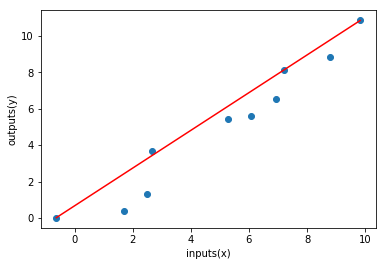

In [5]:
plt.scatter(X_data, y_data)
plt.plot([X_data[0], X_data[-1]], [y_data[0], y_data[-1]], color='r')
plt.xlabel('inputs(x)')
plt.ylabel('outputs(y)')

### I plotted the data as well as drawn a hypothetical line passing through this data. This line is not the final result yet. I am just connecting first and last point in graph. This line is just to visualize how we are going to solve this problem.
### We need to draw a line such that average of distances between each point and line is minimum. This is because for a value of x we need as close approximation to the y as possible.

## Step 2:
### We need to calculate `m` and `c`. But initially we have none of these values. We only have `x` and `y`. The question is what should be the initial values for `m` and `c` since we do not have anything. 
### We can simply start with random values.

In [6]:
m = random.random()
c = random.random()

m, c

(0.5543352261956965, 0.8530159729864736)

### Let's visualize the line by putting above randomly generated variables in the equation `y = mx+c`.

In [7]:
yhat = m*X_data + c

yhat

array([0.50484082, 1.80454434, 2.22669874, 2.33963114, 3.78612717,
       4.22679494, 4.70039438, 4.85738563, 5.73100657, 6.30080371])

### Using NumPy we can do operations on each element of array simultaneously. Hence we get prediction for each value (x) in X_data simultaneously here.

Text(0, 0.5, 'outputs')

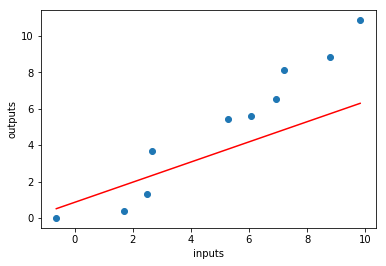

In [8]:
plt.scatter(X_data, y_data)
plt.plot(X_data, yhat, color='r')
plt.xlabel('inputs')
plt.ylabel('outputs')

### Here `yhat` is the hypothesis or predicted value. We can see that this line is far from predicting correct value. Now we need to figure out a way to change `m` and `c` to bring this line more close to the points.

### Let's calculate the difference between predicted values `yhat` and actual values `y`. This is called the `error`. This will let us know how much far we are from the goal.
### For optimization purpose we calculate the half of mean of square of differences between the `yhat` and `y`. This is called mean squared error function or cost function. Mathematically it can be represented as follows.

### $costfunction = \frac{\sum_{i=1}^{n}(yhat_{i} - y_{i})^{2}}{2n}$, 
#### where $n$ is the number of data, 
#### $yhat_i$ is predicted value for $x_i$,
#### $y_i$ is actual value for $x_i$.

### We just need to minimize this error or cost. In other words we need to reduce the values to as close to 0 as possible.
### Since everything else is constant we can only change the `yhat` value.
### But $yhat_i = m*x_i + c$. So if we replace yhat in above equation we get following equation.

### $costfunction = \frac{\sum_{i=1}^{n}((m*x_i + c) - y_{i})^{2}}{2n}$

### Hence to minimize the above equation we need to tweak the values of `m` and `c`.

# Graph for Cost Function

<span style="display:inline-block"><img src="cost_function.png" width=400/></span>

## Step 3:
### To minimize the cost function. we will use Gradient Descent algorithm. 
### In this algorithm, the gradient of the cost function with respect to the each causes of the error (`m` or `c`) is calculated. This gradient value will then be then subtracted from the respective cause of the error . This process will continue until we reduce the cost to nearly 0.
### This does not necessarily mean that the values of `m` and `c` will also be reduced. The gradient is nothing but slope of the line (differentiation) of the cost function which can be negative or positive.
### Following equation represent the calculation to tweak the values of `m` and `c`

### $m = m - \alpha\frac{d}{d_m}C(m, c)$

### $c = c - \alpha\frac{d}{d_c}C(m, c)$

### where $C(m, c) = \frac{\sum_{i=1}^{n}((m*x_i + c) - y_{i})^{2}}{2n}$

### Solving the above equations, we get following formulas

### $m = m - \alpha\frac{\sum_{i=1}^{n}((m*x_i + c) - y_{i})x_i}{n}$

### $c = c - \alpha\frac{\sum_{i=1}^{n}((m*x_i + c) - y_{i})}{n}$

### Here $\alpha$ is learning rate which controls the rate of change of values of `m` and `c`.

### The above process can be visualized as follows

<span style="display:inline-block"><img src="cost_function.gif" width=400/></span>

### In above graph we can asume that X-axis is m, Y-axis is c and Z-axis is C(m, c)

### Now, let's implement this in code.

In [25]:
alpha = 0.03
m_1 = m
c_1 = c

def calculate_yhat(m, x, c):
    return c + m*x

def calculate_gradient_for_c(c, yhat, y, alpha):
    return alpha*(np.sum(yhat-y)/len(y))

def calculate_gradient_for_m(m, yhat, x, y, alpha):
    return alpha*((np.sum((yhat-y)*x))/len(y))

def cost_function(y, yhat):
    return np.mean((yhat-y)**2)/2

yhat = calculate_yhat(m_1, X_data, c_1)
cost = cost_function(y_data, yhat)

print("Initial cost of the model => " + str(cost))

iteration = 1

while cost >= 0.1 and iteration < 500:
    m_1 -= calculate_gradient_for_m(m_1, yhat, X_data, y_data, alpha)
    c_1 -= calculate_gradient_for_c(c_1, yhat, y_data, alpha)
    yhat = calculate_yhat(m_1, X_data, c_1)
    cost = cost_function(y_data, yhat)
    if iteration % 100 == 0 or iteration == 1:
        print("Cost of the model for iteration " + str(iteration) + " => " + str(cost))
    iteration += 1

print("Final cost of the model => " + str(cost))
print("m => " + str(m_1))
print("c => " + str(c_1))

Initial cost of the model => 2.707229137096532
Cost of the model for iteration 1 => 0.5343181178269789
Cost of the model for iteration 100 => 0.34661077082972336
Cost of the model for iteration 200 => 0.3145733763363679
Cost of the model for iteration 300 => 0.3086618688651289
Cost of the model for iteration 400 => 0.30757108351459855
Final cost of the model => 0.3073705891037621
m => 1.069359439343998
c => -0.29976377408914445


### Here you can see that for every iteration our cost is reducing, which means our model is getting better and better. 
### You can notice that for first few iterations our cost reduced at greater rate than for iterations around 400 to 500. This is because the slope is getting flatter as we go down. Hence the value of slope is reducing.
### Lets visualize our final predictions on graph.

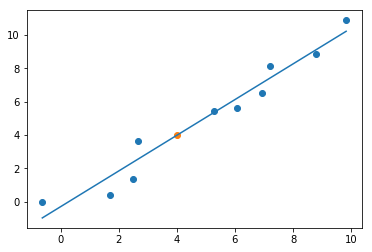

In [23]:
plt.scatter(X_data, y_data)
plt.plot(X_data, yhat)
plt.scatter(4, m_1*4+c_1)